# EVALUACIÓN DE APTITUD TERRITORIAL PARA IDENTIFICACIÓN DE ZONAS DE EXPANSIÓN URBANA PARA MUNICIPIOS INTERMEDIOS

## OBJETIVO


Identificar áreas potenciales de expansión urbana considerando criterios demográficos, ambientales, físicos y de accesibilidad, a través de herramientas de análisis espacial.

### PREPARACIÓN DE DATOS 

In [29]:
import geopandas as gpd
import rasterio as rs
import numpy as np
import matplotlib.pyplot as plt

### Datos Usados 

1. **Limite Municipal** – Shapefile del limite de Interes - IGAC 
2. **Limites centros poblados** Shapefile de los limites de los centros poblados -DANE
3. **Clasificación uso de suelo** – Shapefile Clasificación uso de suelo - POT  
4. **Coberturas de la tierra** – Shapefile Mapa de Cobertura de la Tierra. Adaptación Corine Land Cover. Escala 1:100.000. Periodo 2018- IDEAM
5. **Zonificación amenaza por remoción en masa** - Shapefile Zonificación de Amenazas por movimientos en masa - SGC
6. **Vías**
7. **Drenajes sencillos**
8. **Drenajes Dobles**
9. **Cuerpos de Agua**
10. **Modelo Digital de terreno** - Modelo digital de terreno del Municipio, resolución 1 m,Año 2023 - IGAC


In [36]:
Ruta_Carpeta=r"/notebooks/PROYECTO_FINAL/Datos"

Municipio_interes = Ruta_Carpeta+'/TOCANCIPA.shp'
Centros_poblados = Ruta_Carpeta+'/Centros_Poblados_Cundinamarca.shp'
Clasificacion_suelo = Ruta_Carpeta+'/Clasificacion_suelo_Cundinamarca.shp'
Coberturas_tierra = Ruta_Carpeta+'/Coberturas_Cundinamarca.shp'
Zon_Amenazas = Ruta_Carpeta+'/Remocion_Cundinamarca.shp'
DTM = Ruta_Carpeta+'/MDT_Tocancipa.tif'

In [37]:
# Cargue de datos vectoriales
municipio = gpd.read_file(Municipio_interes).to_crs(epsg=9377)
Centros_pob = gpd.read_file(Centros_poblados).to_crs(epsg=9377)
uso_suelo = gpd.read_file(Clasificacion_suelo).to_crs(epsg=9377)
coberturas = gpd.read_file(Coberturas).to_crs(epsg=9377)
Amenaza = gpd.read_file(Zon_Amenazas).to_crs(epsg=9377)

In [38]:
with rs.open(DTM) as src:
    dtm = src.read(1)  
    transform = src.transform
    crs = src.crs
    pixel_size_x = transform[0]
    pixel_size_y = -transform[4]  

In [39]:
# Corte de los datos con el municipio de interes


### Visualizacion general de datos

### Pre-procesamiento Datos

In [40]:
# Filtrado de capas

# Amenaza de movimientos en masa alta y muy alta
Amenaza_alta = Amenaza[Amenaza['Amenaza'].isin(['4. Alta', '5. Muy Alta'])]

# Coberturas bosques
coberturas_bosques = coberturas[coberturas['nivel_1'] == '3. Bosques y áreas seminaturales']

# Coberturas agrícolas
coberturas_agricolas = coberturas[coberturas['nivel_1'] == '2. Territorios agrícolas']

Suelo_Proteccion = uso_suelo[uso_suelo['CS_TIPO'] == 'Suelo de protección']

Zonas_Expansion_Existente = uso_suelo[uso_suelo['CS_TIPO'] == 'Expansión urbana']


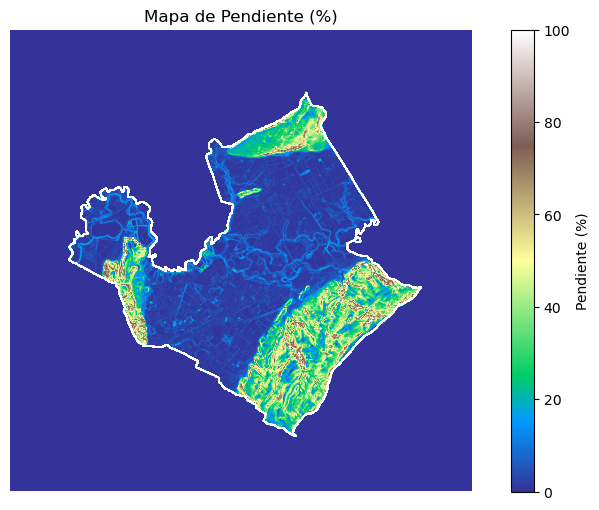

In [41]:
#Mapa de pendientes a partir del MDT 
#>15

# Calcular derivadas espaciales (gradientes)
gy, gx = np.gradient(dtm, pixel_size_y, pixel_size_x)

# Calcular pendiente en porcentaje
slope_percent = np.sqrt(gx**2 + gy**2) * 100

# Visualizar mapa de pendientes
plt.figure(figsize=(10, 6))
plt.imshow(slope_percent, cmap='terrain', vmin=0, vmax=100)
plt.colorbar(label='Pendiente (%)')
plt.title("Mapa de Pendiente (%)")
plt.axis('off')
plt.show()


In [ ]:
# Generación areas de influencia (buffer) 
# Cercania a vias

# Rondas hídricas

# Proximidad a centros poblados ( 1 km)